In [2]:
import numpy as np
import scipy.sparse as sparse
import scipy.linalg as sla
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt
%matplotlib inline

Let's make a *random* sparse matrix

First we'll set the density so that
$$
density = \frac{nnz(A)}{n^2}
$$

In [3]:
n = 100
density = 10.0 / n # 5 points per row
nnz = int(n*n*density)

Now make the entries:

In [4]:
row = np.random.random_integers(low=0, high=n-1, size=nnz)
col = np.random.random_integers(low=0, high=n-1, size=nnz)
data = np.ones(nnz, dtype=float)

A = sparse.coo_matrix((data, (row, col)), shape=(n, n))
print(A.dtype)

float64


But let's make it positive definite:

In [5]:
A.data[:] = -1.0                   # -1 for off-diagonals
rowsum = -np.array(A.sum(axis=1)) + 1 # positive rowsum
rowsum = rowsum.ravel()
A.setdiag(rowsum)

In [6]:
u = np.random.rand(n)
v = np.random.rand(n)

In [7]:
A = A.tocsc()
%timeit s = spla.splu(A)

1000 loops, best of 3: 417 µs per loop


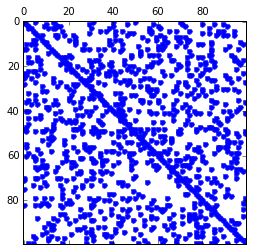

In [8]:
plt.spy(A, marker='.')

In [8]:
B = A.todense()

In [9]:
%timeit p, L, U = sla.lu(B)

The slowest run took 16.43 times longer than the fastest. This could mean that an intermediate result is being cached 
1000 loops, best of 3: 213 µs per loop


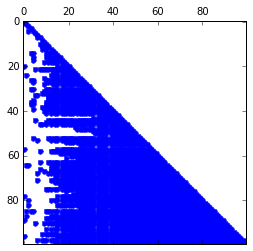

In [9]:
s = spla.splu(A)
plt.spy(s.L, marker='.')